In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [47]:
df = pd.read_csv('results.csv')

df.head(50)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


# PROJECT IDEAS

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43182 entries, 0 to 43181
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        43182 non-null  object
 1   home_team   43182 non-null  object
 2   away_team   43182 non-null  object
 3   home_score  43182 non-null  int64 
 4   away_score  43182 non-null  int64 
 5   tournament  43182 non-null  object
 6   city        43182 non-null  object
 7   country     43182 non-null  object
 8   neutral     43182 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [49]:
df.tournament.unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'Arab Cup', 'South Pacific Games',
       'CONCACAF Champ

In [50]:
df.describe()

,home_score,away_score
count,43182.000000,43182.000000
mean,1.742416,1.182669
std,1.753068,1.399705
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


Who is the best team of all time (Which teams dominated DIFFERENT ERAS of football)

What trends have there been in international football throughout the ages

tables for each of these:

- home advantage (simple bar graph comparing number of wins in away vs home situations)

- total goals scored by each team (countplot, piechart)

- Which teams are the most active in playing friendlies (countplot), 
- ---> does this corrolate with overall games won? (exclusing friendlies) (combined scatterplot)

- who has won most world cups (every team plays)

- who has been in most WC finals (which team is biggest bottler)

- Final summary of who is best team, based upon previous data (opinionated descision)

In [51]:
df['home_wins'] = df['home_score']>df["away_score"]
df['draw'] = df['home_score']==df["away_score"]
df['away_wins'] = df['home_score']<df["away_score"]
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_wins,draw,away_wins
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,False,True,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,True,False,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,True,False,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,False,True,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
43177,2022-02-01,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,True,False,False
43178,2022-02-02,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True,False,False,True
43179,2022-02-03,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,False,True,False
43180,2022-02-05,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False,False,True,False


In [52]:
# converting to date_time()

df['date']= pd.to_datetime(df['date'])

In [53]:
df.value_counts(df['home_wins'])

home_wins
False    22178
True     21004
dtype: int64

In [54]:
df.value_counts(df['away_wins'])

away_wins
False    30959
True     12223
dtype: int64

In [55]:
df.value_counts(df['draw'])

draw
False    33227
True      9955
dtype: int64

In [56]:
# countries with most wins

country =[]
for i in range(len(df['date'])):
    if df['home_wins'][i]==True:
        country.append(df['home_team'][i])
    elif df['away_wins'][i]==True:
        country.append(df['away_team'][i])
df2 = pd.DataFrame(country)
df2[0].value_counts()

Brazil          643
England         592
Germany         570
Argentina       539
Sweden          514
               ... 
Asturias          1
Two Sicilies      1
Kabylia           1
Gozo              1
Micronesia        1
Name: 0, Length: 298, dtype: int64

In [57]:
wins_overall = df2[0].value_counts().nlargest(10).to_frame()

In [58]:
lst = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [59]:
sns.set_style('whitegrid')

In [60]:
sns.set_palette('Blues')
sns.color_palette()

[(0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]

In [61]:
from matplotlib import rcParams

In [62]:
rcParams['font.style'] = 'normal'

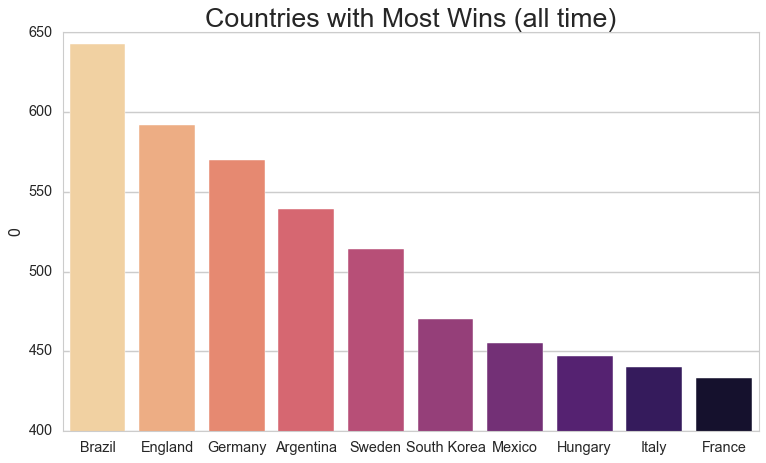

In [63]:
plt.figure(figsize=(10,6))

sns.barplot(data=wins_overall, x=wins_overall.index, y=wins_overall[0], palette='magma_r')
plt.ylim(400, 650)
plt.title('Countries with Most Wins (all time)', fontsize=(24))

plt.show()

In [64]:
df2.value_counts()

Brazil                   643
England                  592
Germany                  570
Argentina                539
Sweden                   514
                        ... 
San Marino                 1
Micronesia                 1
Surrey                     1
Gozo                       1
Republic of St. Pauli      1
Length: 298, dtype: int64

In [ ]:
for i in plt.style.available:
    plt.style.use(i)
    df.home_score.plot(kind='hist', title=i)
    plt.show()

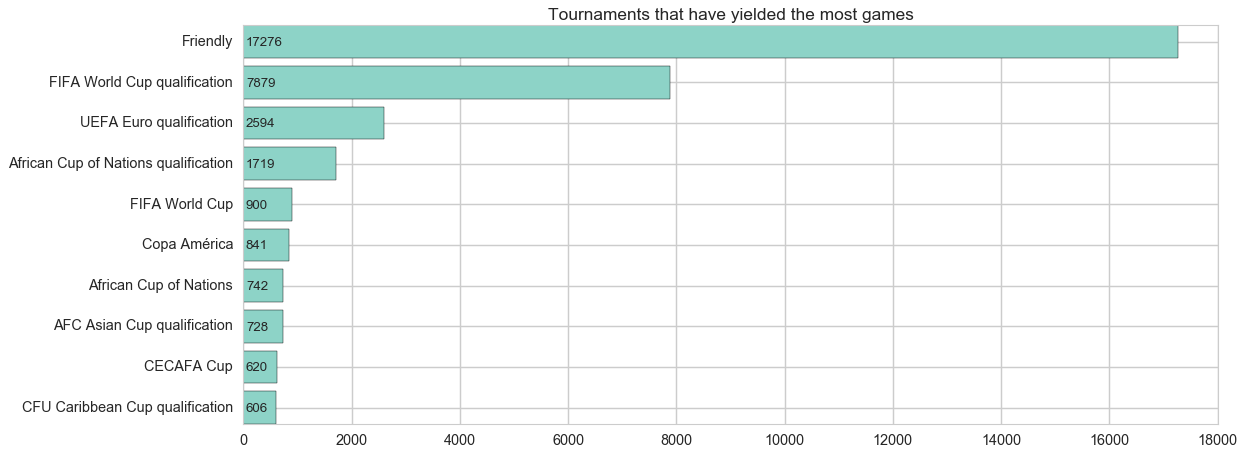

In [66]:
# tournaments that have had the most games

sns.set_palette('Set3')

rank_bound = 10
ax = df.tournament.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value)
for i in range(rank_bound):
    plt.text(x=50,y=i-0.1,s=value[i],fontsize=12)
plt.title('Tournaments that have yielded the most games')
plt.savefig('Tournaments Most Games.png', bbox_inches = 'tight', transparent = True)
plt.show()

In [67]:
friendly_teams=[]

for i in df['tournament']:
    if i == 'Friendly':
        friendly_teams.append((df['home_team'])), friendly_teams.append((df['away_team']))

In [69]:
df.tournament.unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'Arab Cup', 'South Pacific Games',
       'CONCACAF Champ

In [70]:
h = df.loc[df.tournament=='Friendly', 'home_team']
a = df.loc[df.tournament=='Friendly', 'away_team']

In [71]:
friendly_count = pd.concat([a,h]).value_counts().head(10).to_frame()
friendly_count

,0
Germany,574
Hungary,567
Sweden,547
Poland,531
France,490
Austria,467
Switzerland,460
Netherlands,453
Belgium,448
Mexico,447


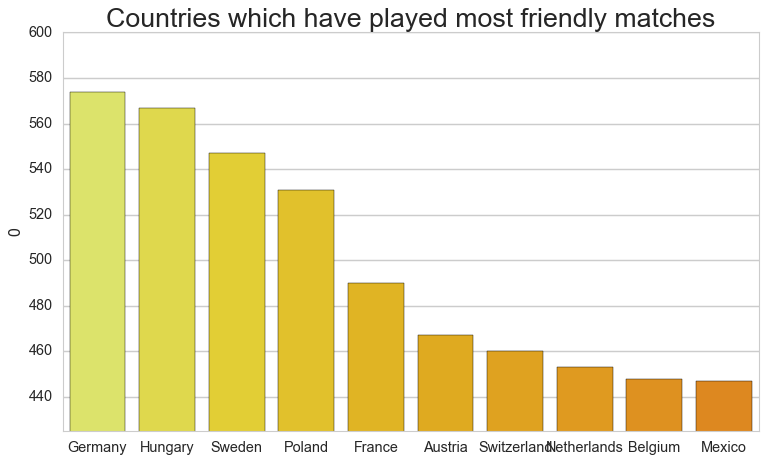

In [72]:
plt.figure(figsize=(10,6))

sns.barplot(data=friendly_count, x=friendly_count.index, y=friendly_count[0], palette='Wistia')
plt.ylim(425, 600)
plt.title('Countries which have played most friendly matches', fontsize=(24))
plt.show()
# SAVED

In [73]:
# Countries with most matches played of all time

h2 = df.loc[df['tournament'].index, 'home_team']
a2 = df.loc[df['tournament'].index, 'away_team']

matches_played = pd.concat([a2,h2]).value_counts().head(10).to_frame()
matches_played

,0
Sweden,1043
England,1036
Brazil,1006
Argentina,1003
Germany,974
Hungary,955
Uruguay,906
Mexico,898
South Korea,890
France,864


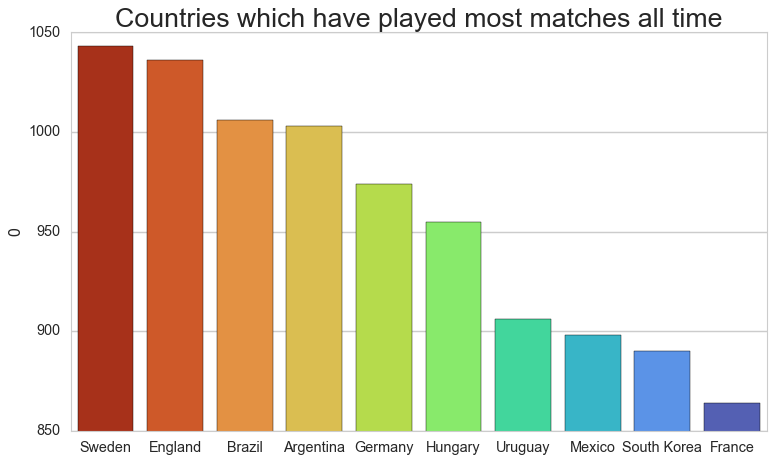

In [74]:
plt.figure(figsize=(10,6))

sns.barplot(data=matches_played, x=matches_played.index, y=matches_played[0], palette='turbo_r')
plt.ylim(850, 1050)
plt.title('Countries which have played most matches all time', fontsize=(24))
plt.show()
# SAVED

In [75]:
# getting number of matches played in world cups by each team

h1 = df.loc[df.tournament=='FIFA World Cup', 'home_team']
a1 = df.loc[df.tournament=='FIFA World Cup', 'away_team']

In [76]:
world_cup_count = pd.concat([a1,h1]).value_counts().head(10).to_frame()
world_cup_count

,0
Brazil,109
Germany,109
Italy,83
Argentina,81
England,69
France,66
Spain,63
Mexico,57
Uruguay,56
Sweden,51


In [77]:
world_cup_count.index

Index(['Brazil', 'Germany', 'Italy', 'Argentina', 'England', 'France', 'Spain',
       'Mexico', 'Uruguay', 'Sweden'],
      dtype='object')

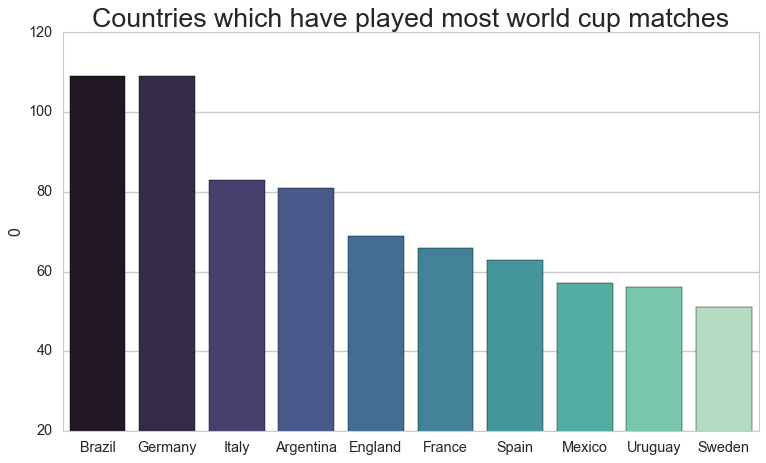

In [78]:
plt.figure(figsize=(10,6))

sns.barplot(data=world_cup_count, x=world_cup_count.index, y=world_cup_count[0], palette='mako')
plt.ylim(20, 120)
plt.title('Countries which have played most world cup matches', fontsize=(24))
plt.show()
# SAVED

In [79]:
Winners = 'Brazil','Germany', 'Italy', 'Argentina', 'Uruguay', 'France', 'England', 'Spain'
Number_of_wins = 5, 4, 4, 2, 2, 1, 1, 1

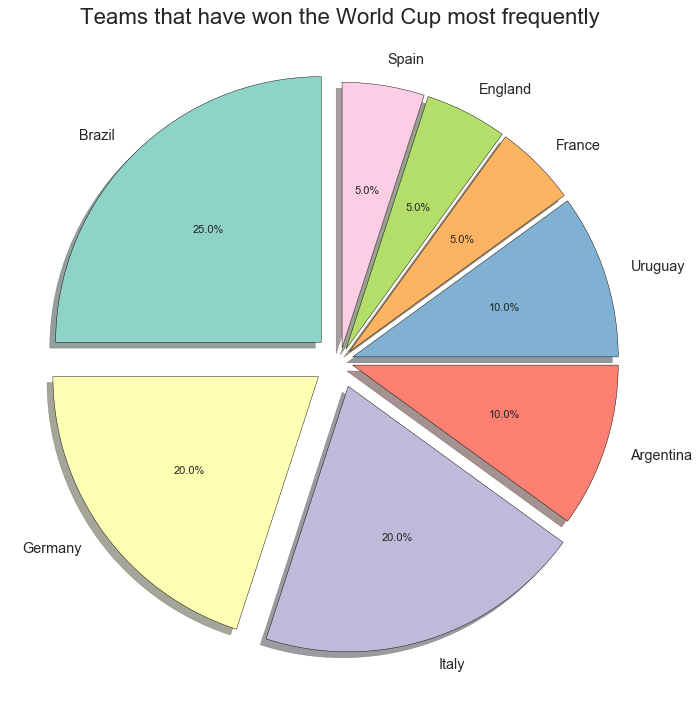

In [80]:
plt.figure(figsize=(15,10))
sns.set_palette('Set3')
explode = (0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(Number_of_wins, explode=explode,labels=Winners, shadow=True, startangle=90, autopct='%1.1f%%')
plt.title('Teams that have won the World Cup most frequently', fontsize=20)
plt.show()
# SAVED

### Creating a winners, runners up and third place grouped bar graph

In [81]:
WC=pd.read_csv('WorldCups.csv')

In [82]:
WC

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [84]:
winners = WC.Winner.value_counts().to_frame()
second = WC['Runners-Up'].value_counts().to_frame()
third = WC.Third.value_counts().to_frame()

In [85]:
winners

,Winner
Brazil,5
Italy,4
Germany FR,3
Uruguay,2
Argentina,2
England,1
France,1
Spain,1
Germany,1


In [86]:
second

,Runners-Up
Argentina,3
Germany FR,3
Netherlands,3
Czechoslovakia,2
Hungary,2
Brazil,2
Italy,2
Sweden,1
Germany,1
France,1


In [87]:
third

,Third
Germany,3
Brazil,2
Sweden,2
France,2
Poland,2
USA,1
Austria,1
Chile,1
Portugal,1
Germany FR,1


In [88]:
top3 = winners.merge(second, how='left', left_index =True, 
              right_index=True ).merge(third, how='left', 
                                       left_index=True, right_index=True).fillna(0)

In [89]:
top3.rename_axis('Country').reset_index()

,Country,Winner,Runners-Up,Third
0,Brazil,5,2.0,2.0
1,Italy,4,2.0,1.0
2,Germany FR,3,3.0,1.0
3,Uruguay,2,0.0,0.0
4,Argentina,2,3.0,0.0
5,England,1,0.0,0.0
6,France,1,1.0,2.0
7,Spain,1,0.0,0.0
8,Germany,1,1.0,3.0


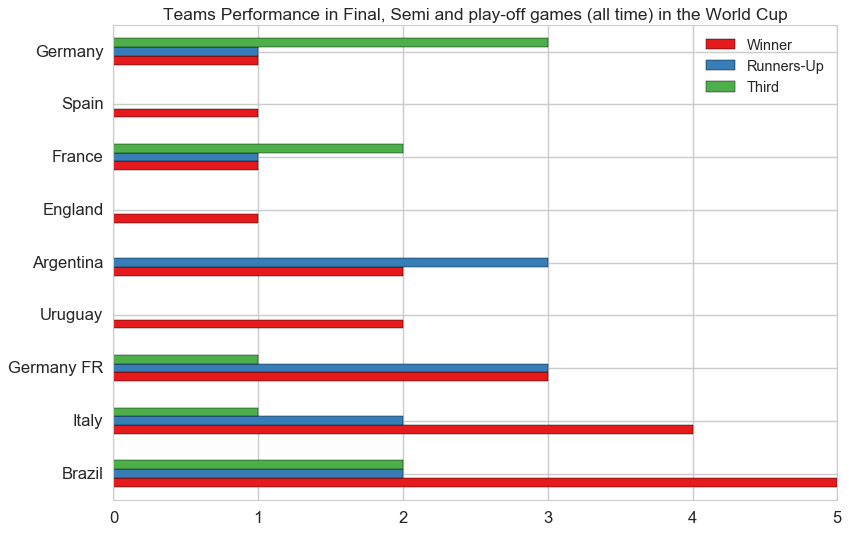

In [90]:
sns.set_palette('Set1')
top3.plot(kind='barh',
        stacked=False,
        title='Teams Performance in Final, Semi and play-off games (all time) in the World Cup', fontsize=15)
plt.savefig('TTP.png', bbox_inches = 'tight', transparent = True)
plt.show()

#SAVED

# Creating The Correlations

 - Correlation between most wins of all time and most world cup wins
 
 - Correlation between which couuntries have played most world cup matches and won most times
 
 - Correlation between which countries have played most matches of all time and won most in world cup

In [91]:
# setting year columns and month columns
df["Year"]=pd.to_datetime(df['date']).dt.year
df["Month"]=pd.to_datetime(df['date']).dt.month

In [92]:
# getting the total goals of a game
df['total_score']=df['home_score']+df['away_score']
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_wins,draw,away_wins,Year,Month,total_score
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,False,True,False,1872,11,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,True,False,False,1873,3,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,True,False,False,1874,3,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,False,True,False,1875,3,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,True,False,False,1876,3,3


In [93]:
#
con=[(df['home_score']==df['away_score']),(df['home_score']>df['away_score']),(df['home_score']<df['away_score'])]
val=[0,1,2]
val2=['no_win',df['home_team'],df['away_team']]
df['result']=np.select(con,val)
df['Who_won?']=np.select(con,val2)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_wins,draw,away_wins,Year,Month,total_score,result,Who_won?
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,False,True,False,1872,11,0,0,no_win
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,True,False,False,1873,3,6,1,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,True,False,False,1874,3,3,1,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,False,True,False,1875,3,4,0,no_win
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,True,False,False,1876,3,3,1,Scotland


In [94]:
most_goals=df.groupby('Who_won?').sum()
most_goals=most_goals[['home_score','away_score','total_score']].sort_values(by=['total_score'],ascending=False)
most_goals=most_goals.drop(['no_win'])
most_goals.head(10)
most_goals.reset_index()

,Who_won?,home_score,away_score,total_score
0,Brazil,1399,841,2240
1,England,1180,1060,2240
2,Germany,1262,906,2168
3,Sweden,1102,811,1913
4,Argentina,1175,628,1803
...,...,...,...,...
293,Gozo,2,1,3
294,Central Spain,1,0,1
295,Raetia,1,0,1
296,Two Sicilies,0,1,1


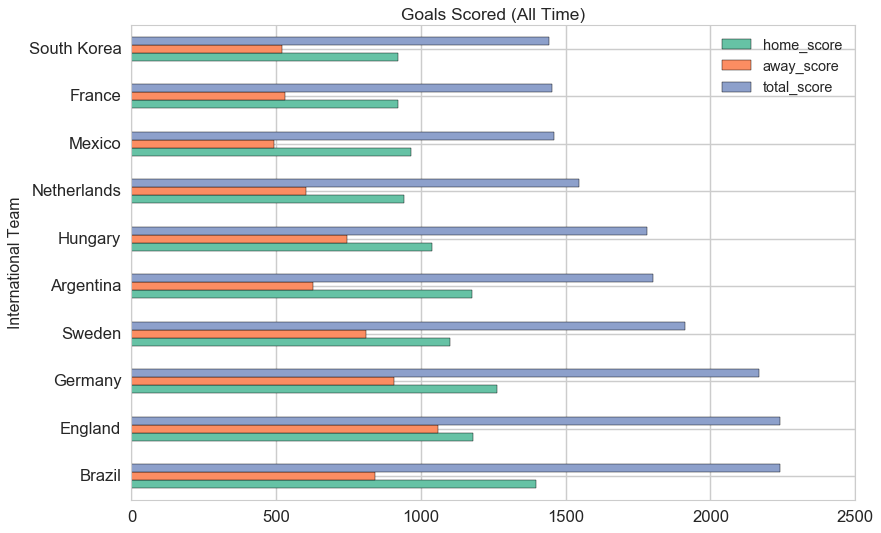

In [95]:
sns.set_palette('Set2')
most_goals.head(10).plot(kind='barh',
        stacked=False,
        title='Goals Scored (All Time)', fontsize=15)
plt.ylabel('International Team')
plt.savefig('All Time Goals.png', bbox_inches = 'tight', transparent = True)
plt.show()

#SAVED

In [96]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_wins,draw,away_wins,Year,Month,total_score,result,Who_won?
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,False,True,False,1872,11,0,0,no_win
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,True,False,False,1873,3,6,1,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,True,False,False,1874,3,3,1,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,False,True,False,1875,3,4,0,no_win
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,True,False,False,1876,3,3,1,Scotland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43177,2022-02-01,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,True,False,False,2022,2,3,1,Suriname
43178,2022-02-02,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True,False,False,True,2022,2,4,2,Senegal
43179,2022-02-03,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,False,True,False,2022,2,0,0,no_win
43180,2022-02-05,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False,False,True,False,2022,2,6,0,no_win


In [97]:
df.loc[df.home_score > df.away_score, "home_team_points"] = 3
df.loc[df.home_score < df.away_score, "away_team_points"] = 3
df.loc[df.home_score == df.away_score, "draw_points"] = 1

In [98]:
Home_win = df.loc[df.home_score > df.away_score][['date','home_team','home_team_points']]
Away_win = df.loc[df.home_score < df.away_score][['date','away_team','away_team_points']]
Home_draw = df.loc[df.home_score == df.away_score][['date','home_team','draw_points']]
Away_draw = df.loc[df.home_score == df.away_score][['date','away_team','draw_points']]

Home_win.columns = ['date', 'team', 'points']
Away_win.columns = ['date', 'team', 'points']
Home_draw.columns = ['date', 'team', 'points']
Away_draw.columns = ['date', 'team', 'points']

In [99]:
Points_over_time = pd.concat([Home_win,Away_win,Home_draw,Away_draw], ignore_index=True).sort_values('date', ascending = False)
Points_over_time["Year"] = Points_over_time.date.dt.year
Points_over_time

,date,team,points,Year
53136,2022-02-06,Egypt,1.0,2022
43181,2022-02-06,Senegal,1.0,2022
43180,2022-02-05,Cameroon,1.0,2022
53135,2022-02-05,Burkina Faso,1.0,2022
53134,2022-02-03,Egypt,1.0,2022
...,...,...,...,...
43183,1875-03-06,Scotland,1.0,1875
1,1874-03-07,Scotland,3.0,1874
0,1873-03-08,England,3.0,1873
43182,1872-11-30,England,1.0,1872


In [100]:
Alltimeleague = Points_over_time.groupby(['team','Year']).points.sum().unstack().fillna(0).T.cumsum().T
Alltimeleague

Year,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
team,,,,,,,,,,,,,,,,,,,,,
Abkhazia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,7.0,7.0,20.0,26.0,39.0,48.0,48.0,48.0,48.0
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.0,71.0,93.0,97.0,106.0,109.0,114.0,114.0,123.0,123.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,249.0,263.0,275.0,291.0,301.0,308.0,321.0,335.0,354.0,354.0
Alderney,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,6.0,6.0,9.0,9.0,9.0,9.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,638.0,666.0,689.0,700.0,721.0,728.0,768.0,772.0,816.0,820.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yugoslavia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,767.0,767.0,767.0,767.0,767.0,767.0,767.0,767.0,767.0,767.0
Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1044.0,1062.0,1093.0,1113.0,1138.0,1157.0,1181.0,1187.0,1206.0,1206.0
Zanzibar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,150.0,150.0,153.0,153.0,164.0,164.0,164.0,164.0,164.0,164.0
